In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from matplotlib.colors import ListedColormap

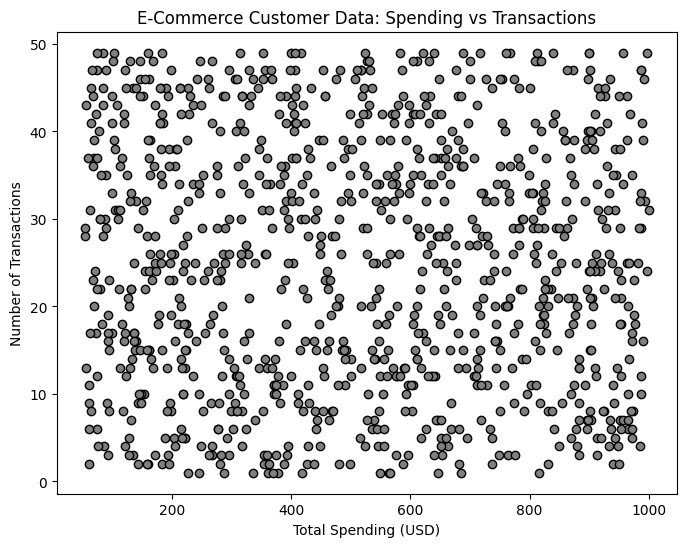

In [10]:
np.random.seed(42)

# Simulate data for 1000 customers
# Feature 1: Total spending between $50 and $1000
customer_spending = np.random.uniform(50, 1000, 1000)
# Feature 2: Number of transactions between 1 and 50
num_transactions = np.random.randint(1, 50, 1000)

# Combine features into a single array
X = np.column_stack((customer_spending, num_transactions))

# Plot the simulated customer data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c='gray', marker='o', edgecolor='k')
plt.title("E-Commerce Customer Data: Spending vs Transactions")
plt.xlabel("Total Spending (USD)")
plt.ylabel("Number of Transactions")
plt.show()

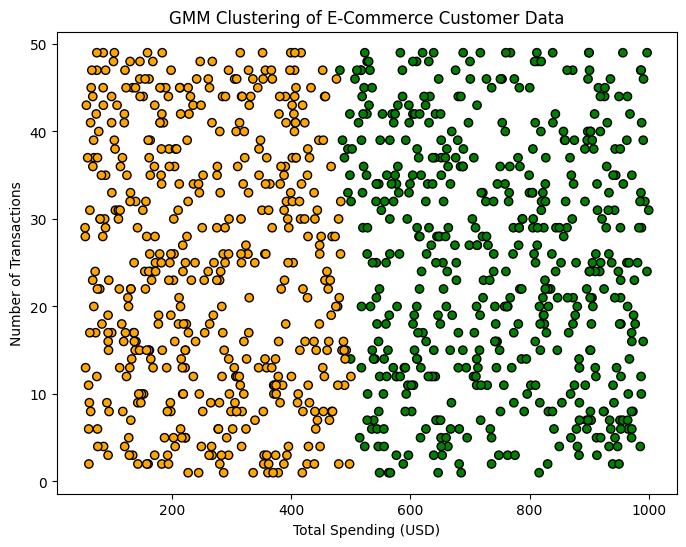

BIC for the model with 2 components: 22128.199758780505


In [11]:
# Let's assume we try 2 clusters as an initial guess
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(X)

# Predict cluster probabilities and assign each sample to the most likely cluster
cluster_probs = gmm.predict_proba(X)
clusters = gmm.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap=ListedColormap(['orange', 'blue', 'green']), marker='o', edgecolor='k')
plt.title("GMM Clustering of E-Commerce Customer Data")
plt.xlabel("Total Spending (USD)")
plt.ylabel("Number of Transactions")
plt.show()

# Evaluate the GMM using Bayesian Information Criterion (BIC)
bic = gmm.bic(X)
print("BIC for the model with 2 components:", bic)

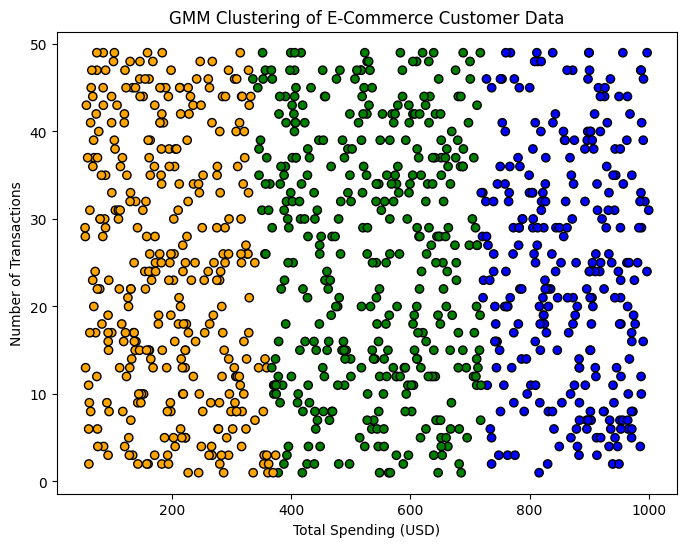

BIC for the model with 2 components: 22082.624311633546


In [12]:
# Let's try 3 clusters
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X)

cluster_probs = gmm.predict_proba(X)
clusters = gmm.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap=ListedColormap(['orange', 'blue', 'green']), marker='o', edgecolor='k')
plt.title("GMM Clustering of E-Commerce Customer Data")
plt.xlabel("Total Spending (USD)")
plt.ylabel("Number of Transactions")
plt.show()

# Evaluate the GMM using Bayesian Information Criterion (BIC)
bic = gmm.bic(X)
print("BIC for the model with 2 components:", bic)

Let's look at how some data points can be a part of multiple clusters

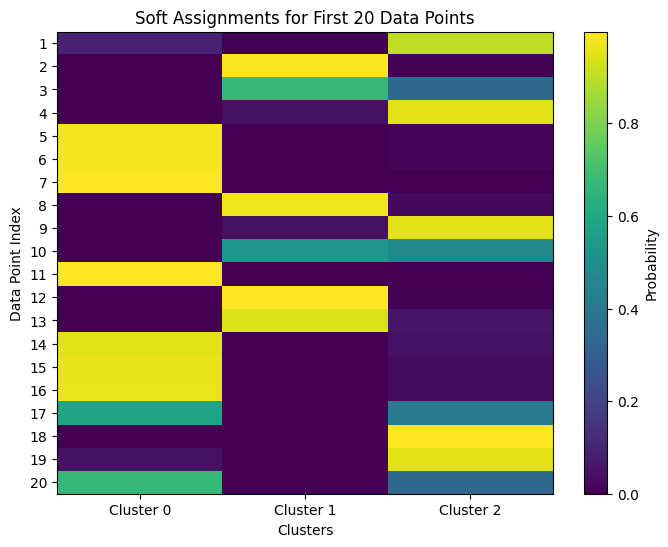

In [13]:
# We'll use the first 20 data points
heatmap_data = cluster_probs[:20, :]

plt.figure(figsize=(8, 6))
plt.imshow(heatmap_data, aspect='auto', cmap='viridis')
plt.colorbar(label='Probability')

num_clusters = heatmap_data.shape[1]
plt.xticks(ticks=np.arange(num_clusters), labels=[f'Cluster {j}' for j in range(num_clusters)])

plt.yticks(ticks=np.arange(heatmap_data.shape[0]), labels=np.arange(1, heatmap_data.shape[0] + 1))

plt.xlabel("Clusters")
plt.ylabel("Data Point Index")
plt.title("Soft Assignments for First 20 Data Points")
plt.show()
